In [8]:
import numpy as np
from lmfit import Model, fit_report

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * np.exp(-b * x) * np.sin(omega * x + phi) + c

def func_tuple(x, fit):
    return fit[0] * np.exp(-fit[1] * x) * np.sin(fit[2] * x + fit[3]) + fit[4]

# Define the callback function
    
progress = []
def per_iteration(pars, iteration, *args, **kws):
    print(" ITER ", iteration, [f"{p.name} = {p.value:.5f}" for p in pars.values()])    
    progress.append([p.value for p in pars.values()])
    #progress_base  = np.concatenate([progress_base, [p.value for p in pars.values()]])

# Load data from text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150_6.txt')

# Define the model to be fitted
model = Model(func)

# Set initial parameter values and bounds
params = model.make_params(a=0.1, b=0.5, omega=0.1, phi=0.1, c=1.0)
params['a'].min = 0.0
params['a'].max = 1.0
params['b'].min = 0.0
#params['b'].max = 5.0
params['omega'].min = 0.0
params['phi'].min = 0
params['phi'].max = 2*np.pi

# Fit the model to the data with callback
result = model.fit(ydata, params, x=xdata, iter_cb=per_iteration)

# Print the fit results
print(fit_report(result))
# progress = np.asarray(progress)
# plt.plot(progress[:,1])

 ITER  -1 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  0 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  1 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  2 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  3 ['a = 0.10000', 'b = 0.50001', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  4 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  5 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10001', 'c = 1.00000']
 ITER  6 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00001']
 ITER  7 ['a = 0.86931', 'b = 12.20508', 'omega = 47.92859', 'phi = 0.14085', 'c = 2.59188']
 ITER  8 ['a = 0.86905', 'b = 12.20508', 'omega = 47.92859', 'phi = 0.14085', 'c = 2.59188']
 ITER  9 ['a = 0.86931', 'b = 12.20495', 'omega = 47.92859', 'phi = 0.14085', 'c = 2.

Text(0.5, 1.0, 'fitting residual of last')

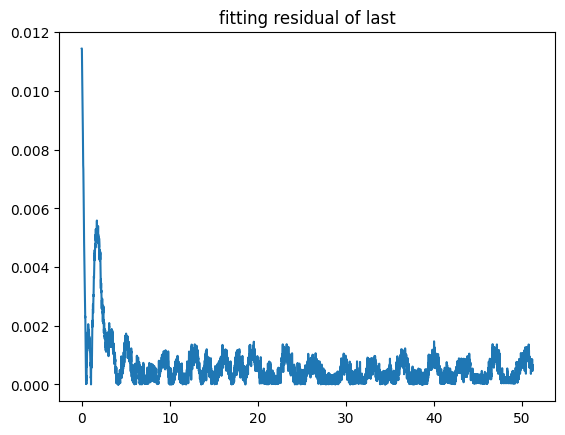

In [20]:
import matplotlib.pyplot as plt
residual_list = [np.abs(ydata[i] - func_tuple(xdata[i], progress[-1])) for i in range(len(ydata))]
plt.plot(xdata, residual_list)
plt.title(r'fitting residual of last')

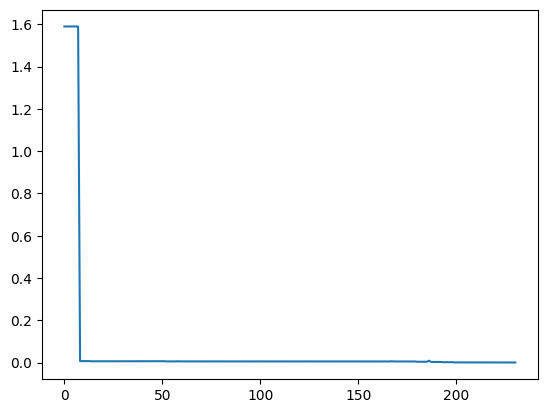

In [21]:
residual_list = []
for j in range(len(progress)):
    residual = [np.abs(ydata[i] - func_tuple(xdata[i], progress[j])) for i in range(len(ydata))]
    residual_mean = np.mean(residual)
    residual_list.append(residual_mean)
    
plt.plot(residual_list)    

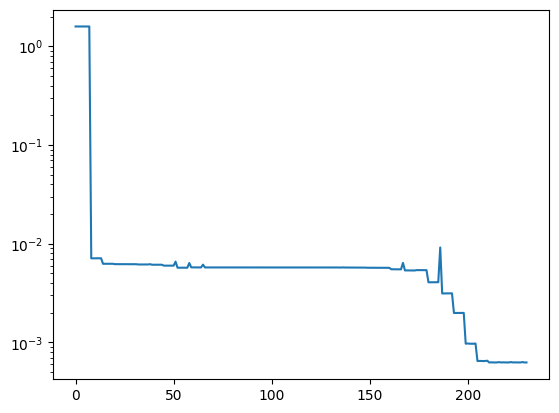

In [23]:
x_axis = [i for i in range(len(progress))]
plt.semilogy(x_axis, np.array(residual_list))

In [24]:
residual_list[-1]

0.0006269835736430791